In [2]:
import sys
sys.path.append('..')
file = '../data/fault_sim/results/cross_comparison.csv'
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import pandas as pd
df = pd.read_csv(file)
thresh = 0.5

In [3]:

f_dict = {0: [0, 0, 0], 1: [0, 0, 1], 2: [0, 1, 0], 3: [1, 0, 0], 4: [0, 1, 1], 5: [1, 1, 0],
          6: [1, 0, 1], 7: [1, 1, 1]}
f_dict = {0: (0, 0, 0), 1: (0, 0, 1), 2: (0, 1, 0), 3: (1, 0, 0), 4: (0, 1, 1), 5: (1, 1, 0),
          6: (1, 0, 1), 7: (1, 1, 1)}
flt_classification = {1:{3,5,6,7}, 2:{2,4,5,7}, 3:{1,4,6,7}}
numerical_columns = [f'{j}' for j in range(8)]
def transform_df(df:pd.DataFrame, thresh = 0.3):
    new_df = df.copy()
    flt_id_series = df.index//10
    source_id_series = df.index%10
    binary_df = df > thresh
    new_df['thresh_nb'] = np.sum([binary_df[f'{i}'] == True for i in range(8)], axis = 0)
    new_df['flt_id'] = flt_id_series
    new_df['source_id'] = source_id_series
    
    for i, row in df.iterrows():
        
        flt_id = flt_id_series[i]
        new_df.loc[i,'thresh_acceptance'] = (row[str(flt_id)]>= thresh).astype(int)
        #first value method
        local_max = np.max(row[numerical_columns])
        new_df.loc[i,'first_value_acceptance'] =  (row[str(flt_id)] >= local_max - 0.05).astype(int)
        thresholded_bool = row[numerical_columns] >local_max - 0.05
        new_df.loc[i,'first_value_nb'] = np.sum(thresholded_bool)
        
        # thresholded_scenarios = row[numerical_columns][thresholded_bool]
        thresholded_scenarios = row[numerical_columns]
        fault_topology_array = list()
        for j in thresholded_scenarios.index:
            fault_topology = f_dict[int(j)]
            fault_topology_array.append(fault_topology)
        fault_topology_array = np.array(fault_topology_array)
        predicted_topology = np.average(fault_topology_array, axis = 0, weights = thresholded_scenarios)
        new_df.loc[i,'f_1_true'], new_df.loc[i,'f_2_true'], new_df.loc[i,'f_3_true'] = tuple(f_dict[flt_id])
        new_df.loc[i,'f_1_pred'], new_df.loc[i,'f_2_pred'], new_df.loc[i,'f_3_pred'] = predicted_topology 
        new_df.loc[i,'f_1_pred_bool'], new_df.loc[i,'f_2_pred_bool'], new_df.loc[i,'f_3_pred_bool'] = round(new_df.loc[i,'f_1_pred'],0), round(new_df.loc[i,'f_2_pred']), round(new_df.loc[i,'f_3_pred'])
        # #combined method
        # new_df.loc[i,'combined_acceptance'] = ((row[str(flt_id)] >local_max - 0.05) & (row[str(flt_id)]>= thresh)).astype(int)
        # new_df.loc[i,'combined_nb'] = np.sum(((row[numerical_columns] >local_max - 0.05) & (row[numerical_columns]>= thresh)))
        
        
        # new_df.loc[i,'f_1'], new_df.loc[i,'f_2'], new_df.loc[i,'f_3'] = tuple(f_dict[flt_id])
        # for key,values in flt_classification.items():
        #     active_flt_ids = values
        #     inactive_flt_ids = set(range(8)).difference(active_flt_ids)
        #     active_flt_avg = np.mean([row[f'{i}'] for i in active_flt_ids])
        #     inactive_flt_avg = np.mean([row[f'{i}'] for i in inactive_flt_ids])
        #     new_df.loc[i,f'active_flt_{key}_avg'] = active_flt_avg 
        #     new_df.loc[i,f'inactive_flt_{key}_avg'] = inactive_flt_avg
        #     new_df.loc[i, f'difference_flt_{key}'] = active_flt_avg - inactive_flt_avg

                        
    return new_df

In [4]:
df = transform_df(df, thresh = thresh)

In [5]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_true=df['f_2_true'], y_pred=df['f_2_pred_bool'])

(array([0.74074074, 1.        ]),
 array([1.  , 0.65]),
 array([0.85106383, 0.78787879]),
 array([40, 40]))

Unnamed: 0                70.000000
0                          0.340662
1                          0.210350
2                          0.297596
3                          0.676271
4                          0.051562
5                          0.676271
6                          0.676271
7                          0.676271
thresh_nb                  4.000000
flt_id                     7.000000
source_id                  0.000000
thresh_acceptance          1.000000
first_value_acceptance     1.000000
first_value_nb             4.000000
f_1_true                   1.000000
f_2_true                   1.000000
f_3_true                   1.000000
f_1_pred                   0.750317
f_2_pred                   0.472006
f_3_pred                   0.447806
f_1_pred_bool              1.000000
f_2_pred_bool              0.000000
f_3_pred_bool              0.000000
Name: 70, dtype: float64


Text(0.5, 0, 'Fault scenario')

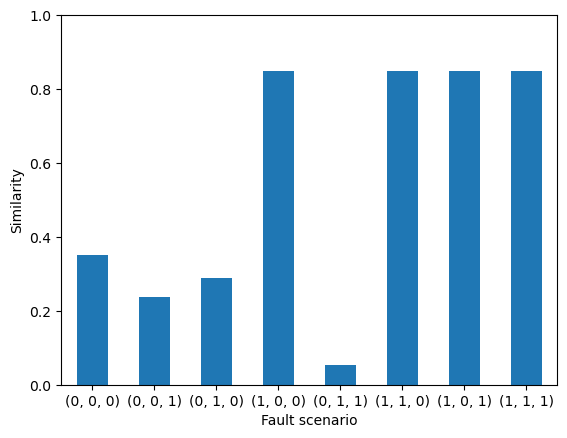

In [6]:
fig,ax = plt.subplots()
print(df.loc[70])
df.loc[30
       ][numerical_columns].plot.bar(ax = ax)
ax.set_ylim(0,1)
ax.set_xticklabels([f_dict[k] for k in range(0,8)], rotation=0)
ax.set_ylabel('Similarity')
ax.set_xlabel('Fault scenario')

In [7]:
df2 = df.groupby('flt_id').mean()

In [8]:
df2

,Unnamed: 0,0,1,2,3,4,5,6,7,thresh_nb,...,first_value_nb,f_1_true,f_2_true,f_3_true,f_1_pred,f_2_pred,f_3_pred,f_1_pred_bool,f_2_pred_bool,f_3_pred_bool
flt_id,,,,,,,,,,,,,,,,,,,,,
0,4.5,0.569334,0.450412,0.080218,0.220149,0.054407,0.212658,0.220149,0.212658,1.6,...,1.7,0.0,0.0,0.0,0.390139,0.254682,0.468640,0.3,0.0,0.1
1,14.5,0.288507,0.268031,0.069228,0.136692,0.045666,0.131876,0.136692,0.131876,0.0,...,1.9,0.0,0.0,1.0,0.364853,0.274868,0.494053,0.2,0.0,0.5
2,24.5,0.080271,0.097742,0.724984,0.047665,0.745988,0.150954,0.047665,0.150954,2.0,...,2.1,0.0,1.0,0.0,0.171863,0.855422,0.520293,0.0,1.0,0.9
3,34.5,0.311326,0.216054,0.075303,0.808749,0.051597,0.659074,0.808749,0.659074,3.6,...,3.2,1.0,0.0,0.0,0.815554,0.385901,0.484697,1.0,0.0,0.1
4,44.5,0.081303,0.098611,0.740225,0.049402,0.810820,0.146324,0.049402,0.146324,2.1,...,2.1,0.0,1.0,1.0,0.158723,0.862924,0.533637,0.0,1.0,0.9
5,54.5,0.269030,0.194414,0.191719,0.624816,0.166814,0.749566,0.624816,0.749566,3.6,...,3.4,1.0,1.0,0.0,0.762034,0.526449,0.486947,0.9,0.3,0.0
6,64.5,0.332062,0.220272,0.075954,0.693241,0.051348,0.571875,0.693241,0.571875,3.4,...,3.4,1.0,0.0,1.0,0.786464,0.381154,0.480187,1.0,0.0,0.1
7,74.5,0.288538,0.199904,0.194392,0.567679,0.169788,0.698054,0.567679,0.698054,3.6,...,3.4,1.0,1.0,1.0,0.744362,0.523264,0.484057,0.9,0.3,0.1


In [9]:
df2.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', 'thresh_nb',
       'source_id', 'thresh_acceptance', 'first_value_acceptance',
       'first_value_nb', 'f_1_true', 'f_2_true', 'f_3_true', 'f_1_pred',
       'f_2_pred', 'f_3_pred', 'f_1_pred_bool', 'f_2_pred_bool',
       'f_3_pred_bool'],
      dtype='object')

In [10]:
def compute_recall_precision(thresh_value = 0.4, method = 'thresh', file_csv = 'df/cross.csv'):
    df_thresh = pd.read_csv(file_csv)
    df_thresh = transform_df(df_thresh, thresh = thresh_value)
    acceptance = f'{method}_acceptance'
    nb = f'{method}_nb'
    recall_dict, precision_dict = {}, {}
    for id in range(1,4):
        (precision, _), (recall, _), _,_ = precision_recall_fscore_support(y_true=df_thresh[f'f_{id}_true'], y_pred=df_thresh[f'f_{id}_pred_bool'])
        precision_dict[id], recall_dict[id] = precision, recall
        
        
    
    recall, precision  = recall_dict, precision_dict
    nb_average = df_thresh[nb].mean()
    FP = ((df_thresh[nb] != 0)& (df_thresh[acceptance] == 0)  ).sum()
    TP = ((df_thresh[nb] != 0)& (df_thresh[acceptance] == 1)  ).sum()
    FN = ((df_thresh[nb] == 0)& (df_thresh[acceptance] == 0)  ).sum()
    success_rate  =  TP/(TP+FP+FN)
    return [recall, precision, success_rate, nb_average]


In [21]:
def plot_recall_precision(file_csv = file):
    
    plt.grid(visible = False)
    dict_1, dict_2,_,_  = compute_recall_precision(thresh_value= 0, file_csv= file_csv)
    for key, value in dict_1.items():
        plt.scatter(key,value, marker = 'x', c= 'blue')
    
    for key, value in dict_2.items():
        plt.scatter(key,value, marker =  'o', c = 'blue')
    plt.ylim(0,1)
    plt.xticks([1,2,3])
    plt.ylim(0,1.1)
    plt.xlabel('Fault id')
    plt.ylabel('Recall/Precision')


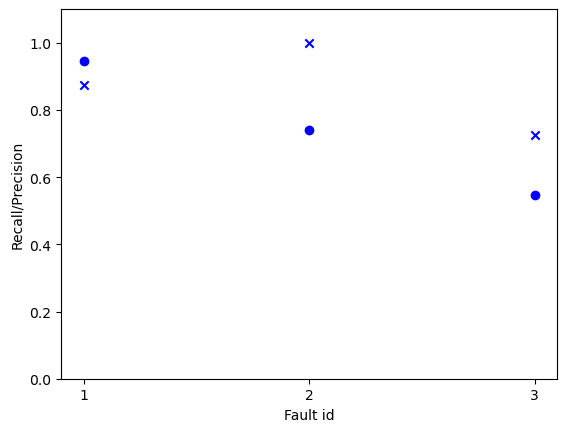

In [22]:
plot_recall_precision()


In [36]:
####
def plot_results(file_csv = file):  
    thresh_set = np.linspace(0,0.99,20)
    thresh_recall_1, thresh_precision_1,thresh_recall_2, thresh_precision_2, thresh_recall_3, thresh_precision_3, thresh_success, thresh_n = [],[],[],[],[],[],[],[]
    combined_recall, combined_precision, combined_success, combined_n = [],[],[],[]
    for thresh_value in thresh_set:
        recall_dict, precision_dict, success_rate, n = compute_recall_precision(thresh_value , method = 'thresh', file_csv= file_csv)
        thresh_success.append(success_rate), thresh_n.append(n)
    
    first_value_recall, first_value_precision, first_value_success, first_value_n = compute_recall_precision(method = 'first_value', file_csv= file_csv)
    methods = ['thresh', 'combined', 'first_value']
    fig,ax = plt.subplots()
    X = np.linspace(0,8,9)
    sc = ax.scatter(thresh_n, thresh_success, c = thresh_set, marker = 'o', label = r'$g_{\lambda}$', cmap = 'cividis')
    fig.colorbar(sc,ax = ax, label = r'Threshold $\lambda$')
    ax.scatter(first_value_n, first_value_success, marker = 'x', c = 'red', label = r'$u$' )
    

    
    ax.scatter(X, (1/8)*X, marker= '+', label = r'$h_{k}$', c = 'black')
    ax.legend()
    # ax.set_title('success')
    ax.set_ylabel(r'$\bar{Y}(f)$')
    ax.set_xlabel(r'$\bar{w}(f)$')
    ax.legend()
    
    fig.tight_layout()



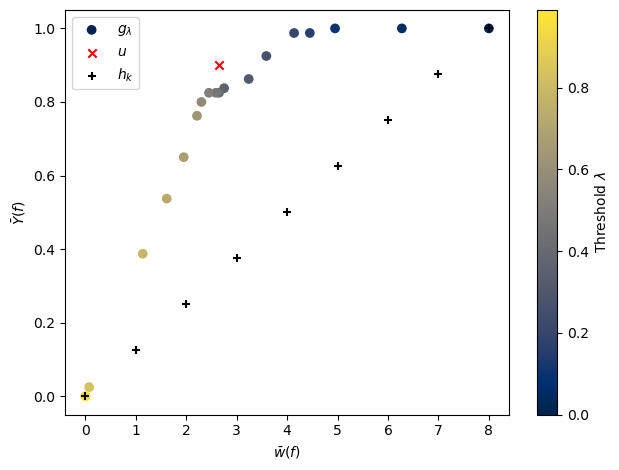

In [37]:
plot_results()